In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Linear Regression with Polynomial Curve Fitting	


In [5]:
#data loading
df = pd.read_csv('globalTemp.csv')
x = df['Year'].to_numpy()
y = df['Actual Temp'].to_numpy()

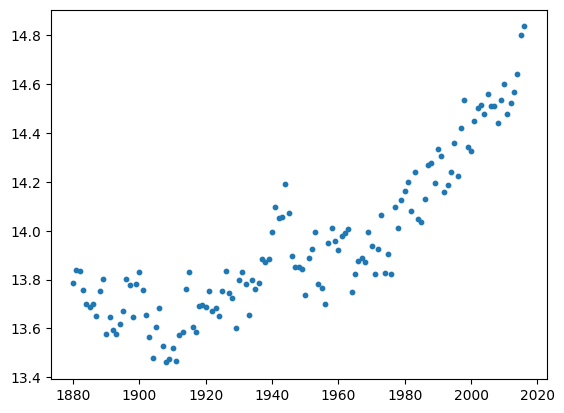

In [6]:
plt.scatter(x, y, s = 10)

In [7]:
# 用二阶多项式去拟合

order = 2 #多项式的阶数
X = np.array([x**i for i in range(order+1)]).T

In [8]:
print(X[0])
print(X.shape)

[      1    1880 3534400]
(137, 3)


Task: implement yourself linear regression using numpy

In [ ]:
X_b = np.c_[np.ones((X.shape[0], 1)), X]
W = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
y_hat = X_b @ W

Task: implement linear regression using the functions from sklearn

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
W_2 = np.concatenate([[model.intercept_], model.coef_])

verify your answer with codes below

In [ ]:
print("our weight = ", W)
print("sklearn weight = ", W_2)

In [ ]:
plt.scatter(x, y, s=10, c="r")
plt.plot(x, y_hat,c="k")
plt.plot(x, y_hat2)

## Linear Regression

In [ ]:
N_SAMPLES = 500
N_FEATURES = 200
NOISE = 3
data = datasets.make_regression(n_samples=N_SAMPLES, 
                                n_features=N_FEATURES, 
                                n_informative=5, 
                                noise=NOISE, 
                                random_state=9961)
X = data[0]
y = data[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9961)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

Task: use numpy to implement linear regression via the normal equation, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [ ]:
def linear_regression_normal_equation(X, y):
    """使用正规方程实现线性回归"""
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # 添加偏置项
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta

# 训练模型
theta = linear_regression_normal_equation(X_train, y_train)

# 预测
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_train_pred = X_train_b @ theta
y_test_pred = X_test_b @ theta

# 计算指标
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
l2_norm = np.linalg.norm(theta[1:])  # 不包括偏置项
l1_norm = np.sum(np.abs(theta[1:]))

print("="*50)
print("NumPy实现结果:")
print(f"训练集MSE: {train_mse:.4f}")
print(f"测试集MSE: {test_mse:.4f}")
print(f"权重L2范数: {l2_norm:.4f}")
print(f"权重L1范数: {l1_norm:.4f}")


Task: use scikit-learn’s LinearRegression to fit the same model without an intercept, compute the L2 and L1 norms of the learned weights, and evaluate the mean squared error on both training and test data.

In [ ]:
sklearn_model = LinearRegression(fit_intercept=True)
sklearn_model.fit(X_train, y_train)

y_train_pred_sk = sklearn_model.predict(X_train)
y_test_pred_sk = sklearn_model.predict(X_test)

train_mse_sk = mean_squared_error(y_train, y_train_pred_sk)
test_mse_sk = mean_squared_error(y_test, y_test_pred_sk)
l2_norm_sk = np.linalg.norm(sklearn_model.coef_)
l1_norm_sk = np.sum(np.abs(sklearn_model.coef_))

print("="*50)
print("sklearn实现结果:")
print(f"训练集MSE: {train_mse_sk:.4f}")
print(f"测试集MSE: {test_mse_sk:.4f}")
print(f"权重L2范数: {l2_norm_sk:.4f}")
print(f"权重L1范数: {l1_norm_sk:.4f}")

# 验证结果一致性
print("="*50)
print("结果比较:")
print(f"MSE差异: {abs(train_mse - train_mse_sk):.10f}")
print(f"权重范数差异: {abs(l2_norm - l2_norm_sk):.10f}")

## Ridge Regression

Task: use numpy to implement ridge regression with various values of regularization strength via the closed-form solution, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [ ]:
def ridge_regression(X, y, alpha=1.0):
    """使用闭式解实现岭回归"""
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    n_features = X_b.shape[1]
    # theta = (X^T X + alpha * I)^(-1) X^T y
    identity = np.eye(n_features)
    identity[0, 0] = 0  # 不对偏置项进行正则化
    theta = np.linalg.inv(X_b.T @ X_b + alpha * identity) @ X_b.T @ y
    return theta

# 测试不同的正则化强度
alphas = [0, 0.1, 1, 10, 100, 1000]

print("="*60)
print("岭回归结果 (NumPy实现)")
print("="*60)

for alpha in alphas:
    theta_ridge = ridge_regression(X_train, y_train, alpha)
    
    # 预测
    X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    y_train_pred_ridge = X_train_b @ theta_ridge
    y_test_pred_ridge = X_test_b @ theta_ridge
    
    # 计算指标
    train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
    test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
    l2_norm_ridge = np.linalg.norm(theta_ridge[1:])
    
    print(f"alpha={alpha}:")
    print(f"  训练集MSE: {train_mse_ridge:.4f}, 测试集MSE: {test_mse_ridge:.4f}")
    print(f"  权重L2范数: {l2_norm_ridge:.4f}")
    print()

Task: use scikit-learn’s Ridge to fit a ridge-regression model with various values of $\lambda$ and no intercept, compute the L2 norm of the learned weights, and evaluate the mean squared error on both training and test data.

In [ ]:
# Task: 使用sklearn的Ridge
print("="*60)
print("岭回归结果 (sklearn实现)")
print("="*60)

for alpha in alphas:
    ridge_model = Ridge(alpha=alpha, fit_intercept=True)
    ridge_model.fit(X_train, y_train)
    
    y_train_pred_ridge_sk = ridge_model.predict(X_train)
    y_test_pred_ridge_sk = ridge_model.predict(X_test)
    
    train_mse_ridge_sk = mean_squared_error(y_train, y_train_pred_ridge_sk)
    test_mse_ridge_sk = mean_squared_error(y_test, y_test_pred_ridge_sk)
    l2_norm_ridge_sk = np.linalg.norm(ridge_model.coef_)
    
    print(f"alpha={alpha}:")
    print(f"  训练集MSE: {train_mse_ridge_sk:.4f}, 测试集MSE: {test_mse_ridge_sk:.4f}")
    print(f"  权重L2范数: {l2_norm_ridge_sk:.4f}")
    print()

## Lasso

Task: use scikit-learn’s Lasso to fit a Lasso-regression model with various values of $\lambda$ and no intercept, compute the L1 norm of the learned weights, report the mean squared error on both training and test data, and count the number of non-zero weights.

In [ ]:
print("="*60)
print("Lasso回归结果")
print("="*60)

alphas_lasso = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alphas_lasso:
    lasso_model = Lasso(alpha=alpha, fit_intercept=True, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    
    y_train_pred_lasso = lasso_model.predict(X_train)
    y_test_pred_lasso = lasso_model.predict(X_test)
    
    train_mse_lasso = mean_squared_error(y_train, y_train_pred_lasso)
    test_mse_lasso = mean_squared_error(y_test, y_test_pred_lasso)
    l1_norm_lasso = np.sum(np.abs(lasso_model.coef_))
    non_zero_weights = np.sum(lasso_model.coef_ != 0)
    
    print(f"alpha={alpha}:")
    print(f"  训练集MSE: {train_mse_lasso:.4f}, 测试集MSE: {test_mse_lasso:.4f}")
    print(f"  权重L1范数: {l1_norm_lasso:.4f}")
    print(f"  非零权重数量: {non_zero_weights}")
    print()

# 可视化正则化效果
plt.figure(figsize=(15, 10))

# 绘制权重范数随alpha变化
plt.subplot(2, 2, 1)
alphas_plot = [0.001, 0.01, 0.1, 1, 10, 100]
l2_norms = []
l1_norms = []
non_zero_counts = []

for alpha in alphas_plot:
    lasso_model = Lasso(alpha=alpha, fit_intercept=True, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    l2_norms.append(np.linalg.norm(lasso_model.coef_))
    l1_norms.append(np.sum(np.abs(lasso_model.coef_)))
    non_zero_counts.append(np.sum(lasso_model.coef_ != 0))

plt.plot(alphas_plot, l2_norms, 'o-', label='L2 Norm')
plt.plot(alphas_plot, l1_norms, 's-', label='L1 Norm')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Norm')
plt.title('Weight Norms vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

# 绘制非零权重数量
plt.subplot(2, 2, 2)
plt.plot(alphas_plot, non_zero_counts, 'o-', color='red')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Number of non-zero weights')
plt.title('Non-zero weights vs Alpha')
plt.grid(True, alpha=0.3)

# 绘制MSE随alpha变化
plt.subplot(2, 2, 3)
train_mses = []
test_mses = []

for alpha in alphas_plot:
    lasso_model = Lasso(alpha=alpha, fit_intercept=True, max_iter=10000)
    lasso_model.fit(X_train, y_train)
    train_mses.append(mean_squared_error(y_train, lasso_model.predict(X_train)))
    test_mses.append(mean_squared_error(y_test, lasso_model.predict(X_test)))

plt.plot(alphas_plot, train_mses, 'o-', label='Train MSE')
plt.plot(alphas_plot, test_mses, 's-', label='Test MSE')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('MSE (log scale)')
plt.title('MSE vs Alpha')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()